In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# this data is from the us treasury dept website
file_path = "C:/Users/arnav/Python Notebooks/BondYieldML/Data/yield-curve-rates-1990-2023.csv"
data = pd.read_csv(file_path, parse_dates=['Date'])
data.set_index('Date', inplace=True)
data = data[['2 Yr', '10 Yr']]
data = data.interpolate(method='linear') #filling in some missing values

data = data.sort_index()  # sorting by date index


C:\Users\arnav\AppData\Local\Temp\ipykernel_20388\2016712861.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, parse_dates=['Date'])


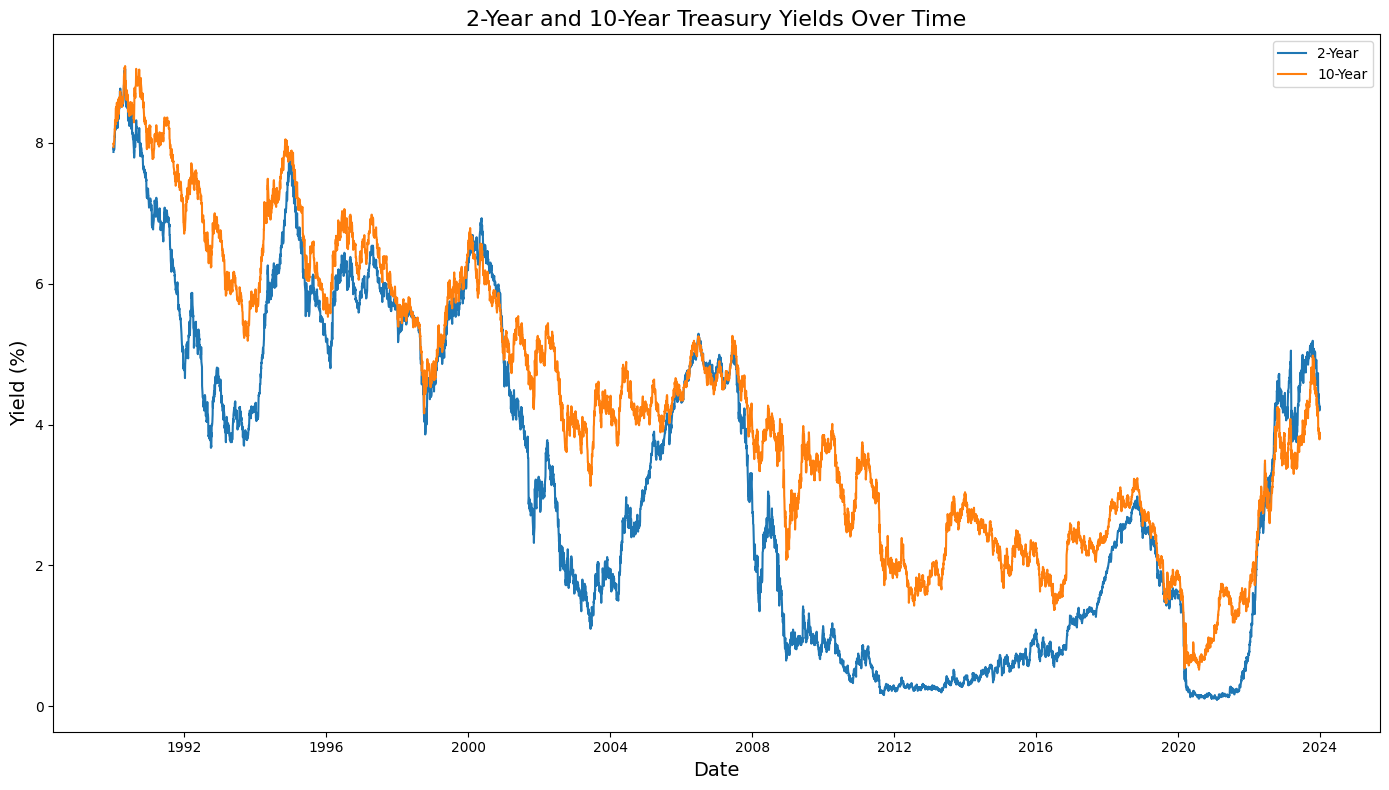

In [13]:
# plotting yields
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['2 Yr'], label='2-Year')
plt.plot(data.index, data['10 Yr'], label='10-Year')
plt.title('2-Year and 10-Year Treasury Yields Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Yield (%)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# 2s10s spread
data['Yield Spread'] = data['10 Yr'] - data['2 Yr']

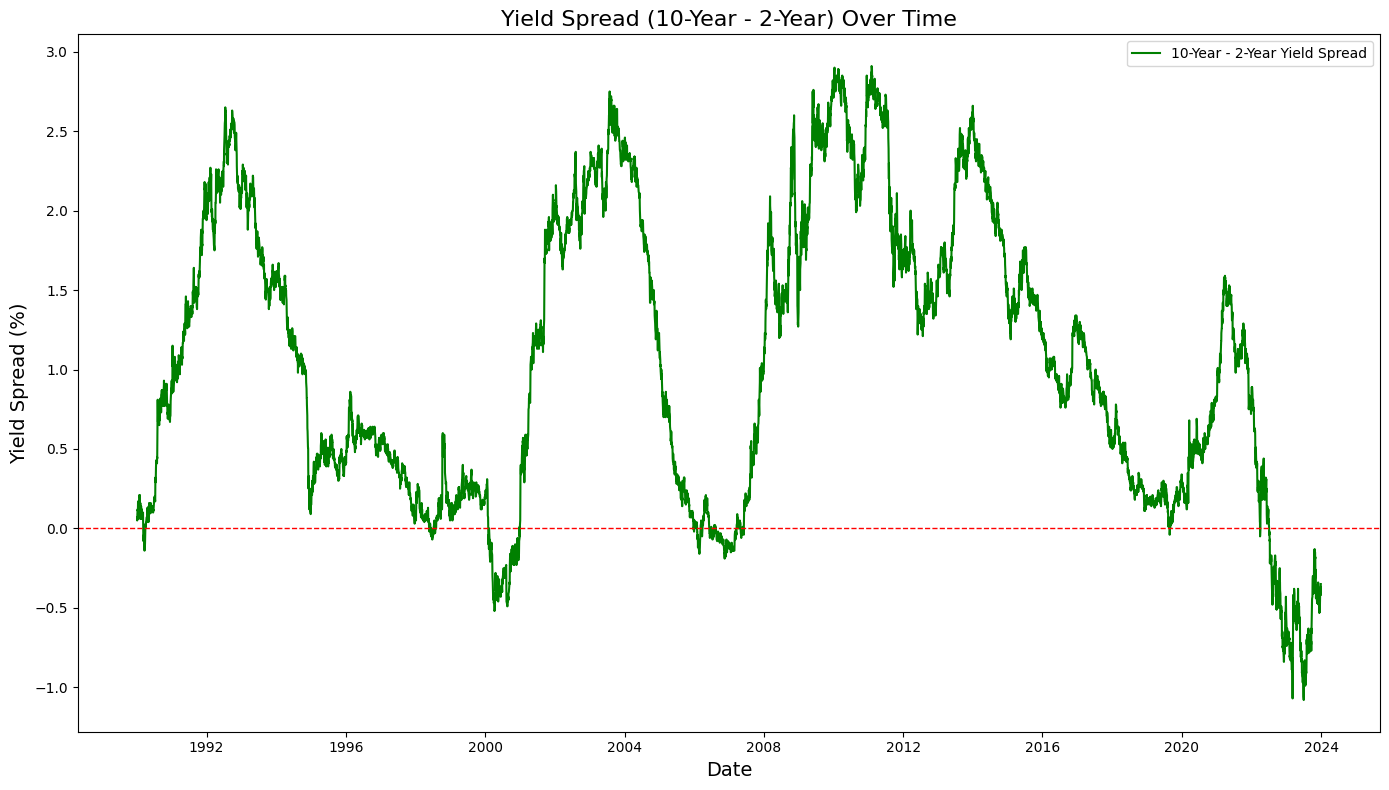

In [16]:
# yield spread over time
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Yield Spread'], label='10-Year - 2-Year Yield Spread', color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Yield Spread (10-Year - 2-Year) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Yield Spread (%)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
# yield curve inversions:
yield_curve_inversions = data[data['Yield Spread'] < 0]
print(f'Number of Yield Curve Inversions: {len(yield_curve_inversions)}')
print(f'Dates of Yield Curve Inversions:\n{yield_curve_inversions.index}')


Number of Yield Curve Inversions: 886
Dates of Yield Curve Inversions:
DatetimeIndex(['1990-03-08', '1990-03-09', '1990-03-12', '1990-03-13',
               '1990-03-14', '1990-03-15', '1990-03-16', '1990-03-19',
               '1990-03-20', '1990-03-21',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=886, freq=None)


In [7]:
# statistical summary

correlation = data['2 Yr'].corr(data['10 Yr'])
print(f'Correlation between 2 and 10 year yields: {correlation:.2f}')

yield_spread_summary = data['Yield Spread'].describe()
print(yield_spread_summary)

Correlation between 2 and 10 year yields: 0.92
count    8507.000000
mean        1.058390
std         0.913594
min        -1.080000
25%         0.260000
50%         1.010000
75%         1.840000
max         2.910000
Name: Yield Spread, dtype: float64


In [8]:
# rolling window analysis of yield spread
rolling_mean = data['Yield Spread'].rolling(window=12).mean()
rolling_std = data['Yield Spread'].rolling(window=12).std()

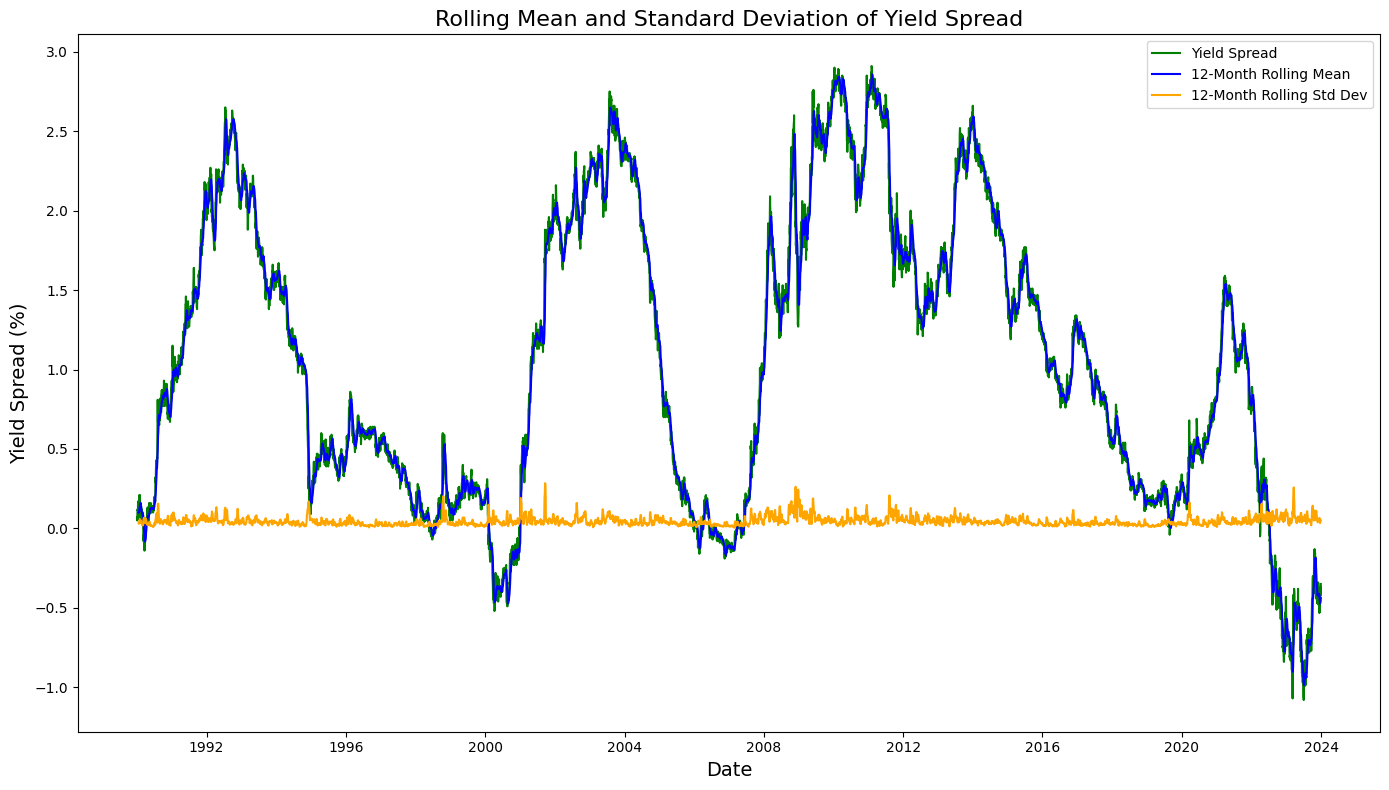

In [9]:
# plottting
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Yield Spread'], label='Yield Spread', color='green')
plt.plot(data.index, rolling_mean, label='12-Month Rolling Mean', color='blue')
plt.plot(data.index, rolling_std, label='12-Month Rolling Std Dev', color='orange')
plt.title('Rolling Mean and Standard Deviation of Yield Spread', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Yield Spread (%)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### **Rolling mean:** Long-term trend in the yield spread.
### **Rolling standard deviation:** Volatility, market uncertainty.